# Final: saving all HMM data, of which the states timecourses.

## The libraries and methods we need:

In [1]:
import numpy as np
# from loader import load_oneIC

In [2]:
# import pickle

In [3]:
import matplotlib.pyplot as plt

In [4]:
# import h5py

In [5]:
import xarray as xr

In [6]:
# directory = "E:/timot/Documents/1 - Centrale Marseille/0.5 - Semestre S8/Stage/NIC_250819"
# file = "FCK_LOCKED_IC_JYOTIKA_250819.mat"

# path = f"{directory}/{file}"

# mat_file = h5py.File(path, "r")
# cells_refs = mat_file['FCK_LOCKED_IC_JYOTIKA']

n_IC = 4
n_subj = 23

## The routine:

In [20]:
lags = np.arange(-29, 29)
n_lags = lags.shape[0]
n_iter=100
n_states=3    # for the Hidden Markov Model
n_components=40     # For the principal component analysis
covariance_type='diag'
model_type='GMMHMM'
tol=0.01
n_mix=1

origin_dir = "tde-hmm2/3st_1IC/nc_files/"
target_dir = "tde-hmm2/3st_1IC/png_files/"

In [33]:
subj_list = [i for i in range(2,9)] + [i for i in range(10,13)] + [14] + [i for i in range(16, n_subj+1)] 
                                                                            # All except subjects 1, 9, 13, 15
for subj in subj_list:
    ds = xr.open_dataset(origin_dir+f"su{subj}-3states_data.nc")
    ds = ds.assign(frac_occ = (ds["states_timecourse"].sum("trials")/ds.sizes["trials"]))
    ds.to_netcdf(origin_dir+f"/su{subj}-3states_data_v2.nc", mode="w")
    ds.close()

In [43]:
for subj in subj_list:
    ds = xr.open_dataset(origin_dir+f"su{subj}-3states_data_v2.nc")
    for i in range(len(ds["IC"].values)):
        labels = [f"state {state}" for state in ds["states"].values]
        fig = plt.figure(figsize=(14,6))
        plt.subplot(121)
        plt.title(f'Frac. Occupancy')
        plt.plot(ds["time"], ds["frac_occ"].values[i,])
        plt.xlabel('Time (s)')
        plt.ylabel('Frac. occupancy')
        plt.legend(labels, loc='upper left')
        plt.subplot(122)
        plt.title(f'Power Spectrum Density')
        plt.plot(ds["freq"], ds["states_psd"].values[i,].T)
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('PSD')
        plt.legend(labels, loc='upper right')
        plt.savefig(target_dir+f"su{subj}IC{ds['IC'].values[i]}-frac_occ.png", dpi=300)
        plt.close(fig)
        print(f"su{subj} IC{ds['IC'].values[i]}")
    ds.close()

su2 IC1
su2 IC2
su2 IC3
su2 IC4
su3 IC1
su3 IC2
su3 IC3
su3 IC4
su4 IC1
su4 IC2
su4 IC3
su4 IC4
su5 IC1
su5 IC3
su5 IC4
su6 IC1
su6 IC2
su6 IC3
su6 IC4
su7 IC1
su7 IC2
su7 IC3
su7 IC4
su8 IC1
su8 IC2
su8 IC3
su8 IC4
su10 IC1
su10 IC2
su10 IC3
su10 IC4
su11 IC1
su11 IC2
su11 IC3
su11 IC4
su12 IC1
su12 IC2
su12 IC3
su14 IC1
su14 IC2
su14 IC3
su14 IC4
su16 IC1
su16 IC2
su16 IC3
su16 IC4
su17 IC1
su17 IC2
su17 IC4
su18 IC1
su18 IC2
su18 IC3
su18 IC4
su19 IC1
su19 IC2
su19 IC3
su19 IC4
su20 IC2
su20 IC3
su20 IC4
su21 IC2
su21 IC3
su21 IC4
su22 IC1
su22 IC2
su22 IC3
su22 IC4
su23 IC1
su23 IC2
su23 IC4


In [38]:
ds = xr.open_dataset(origin_dir+"/su2-3states_data.nc")

In [10]:
ds = ds.assign(frac_occ = (ds["states_timecourse"].sum("trials")/ds.sizes["trials"]))

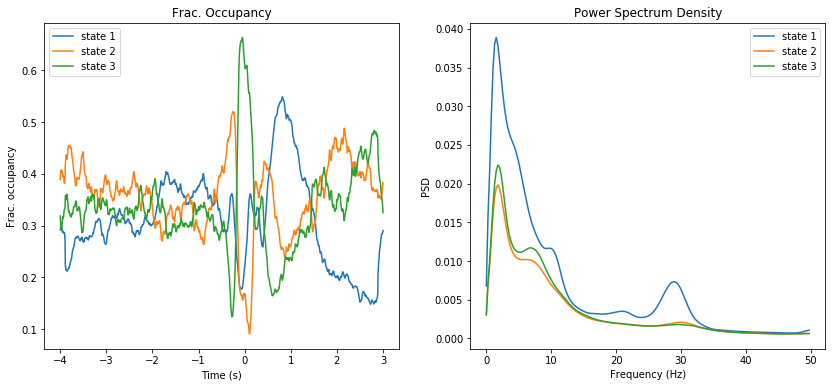

In [33]:
labels = ["state 1", "state 2", "state 3"]
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.title(f'Frac. Occupancy')
plt.plot(ds["time"], frac.values[0,])
plt.xlabel('Time (s)')
plt.ylabel('Frac. occupancy')
plt.legend(labels, loc='upper left')
plt.subplot(122)
plt.title(f'Power Spectrum Density')
plt.plot(ds["freq"], ds["states_psd"].values[0,].T)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.legend(labels, loc='upper right')


In [18]:
ds["frac_occ"].values

array([[[0.29147705, 0.38871281, 0.31832866],
        [0.29175928, 0.39484466, 0.31191457],
        [0.2925032 , 0.40025382, 0.3057615 ],
        ...,
        [0.2868993 , 0.37553452, 0.3360847 ],
        [0.2884664 , 0.37897759, 0.33107453],
        [0.29025246, 0.383322  , 0.32494405]],

       [[0.19690431, 0.28605464, 0.51555957],
        [0.19571788, 0.28137341, 0.52142723],
        [0.19459375, 0.27622551, 0.52769926],
        ...,
        [0.20316965, 0.29578852, 0.49956036],
        [0.20031474, 0.2932595 , 0.50494427],
        [0.19835939, 0.28983461, 0.51032452]],

       [[0.05032254, 0.46003166, 0.48816431],
        [0.05016804, 0.46394241, 0.48440806],
        [0.04998511, 0.46756244, 0.48097097],
        ...,
        [0.04853877, 0.44842142, 0.50155833],
        [0.04892476, 0.45273766, 0.4968561 ],
        [0.04979181, 0.45638686, 0.49233985]],

       [[0.62458465, 0.11039573, 0.26353813],
        [0.62472601, 0.10802758, 0.26576493],
        [0.62473195, 0.10569894, 0.

In [23]:
ds.to_netcdf(origin_dir+"/su2-3states_data_v2.nc", mode="w")

In [44]:
ds.close()

In [27]:
subj=2

ds = xr.open_dataset(origin_dir+f"su{subj}-3states_data.nc")
ds.assign(frac_occ = (ds["states_timecourse"].sum("trials")/ds.sizes["trials"]))
for l in range(len(ds["IC"].values)):
    labels = ["state 1", "state 2", "state 3"]
    fig = plt.figure(figsize=(14,6))
    plt.subplot(121)
    plt.title(f'Frac. Occupancy')
    plt.plot(ds["time"], ds["frac_occ"].values[IC,])
    plt.xlabel('Time (s)')
    plt.ylabel('Frac. occupancy')
    plt.legend(labels, loc='upper left')
    plt.subplot(122)
    plt.title(f'Power Spectrum Density')
    plt.plot(ds["freq"], ds["states_psd"].values[IC,].T)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('PSD')
    plt.legend(labels, loc='upper right')
    plt.savefig(target_dir+f"su{subj}IC{IC}-frac_occ.png", dpi=300)
    plt.close(fig)
ds.to_netcdf(origin_dir+f"/su{subj}-3states_data_v2.nc", mode="w")
ds.close()

In [30]:
ds = xr.open_dataset(origin_dir+f"su3-3states_data.nc")
ds.assign(frac_occ = (ds["states_timecourse"].sum("trials")/ds.sizes["trials"]))

<xarray.Dataset>
Dimensions:            (IC: 4, freq: 196, states: 3, time: 1793, trials: 673)
Coordinates:
  * time               (time) float64 -4.0 -3.996 -3.992 ... 2.992 2.996 3.0
  * freq               (freq) float64 0.0 0.2551 0.5102 ... 49.23 49.49 49.74
  * IC                 (IC) int32 1 2 3 4
  * states             (states) int32 1 2 3
Dimensions without coordinates: trials
Data variables:
    states_timecourse  (IC, trials, time, states) float64 0.0 0.0 ... 0.0 0.0
    states_psd         (IC, states, freq) float64 ...
    frac_occ           (IC, time, states) float64 0.4242 0.3856 ... 0.1472

In [41]:
ds["states_psd"]["IC"]

<xarray.DataArray 'IC' (IC: 4)>
array([1, 2, 3, 4])
Coordinates:
  * IC       (IC) int32 1 2 3 4

In [39]:
for IC in ds["IC"]:
    print(ds["states_psd"][IC,])

<xarray.DataArray 'IC' (IC: 4)>
array([1, 2, 3, 4])
Coordinates:
  * IC       (IC) int32 1 2 3 4